In [1]:
from classes import *
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
jeff = Portfolio(100000)

In [3]:
index = 0
isDaily = 1
isDate = 0

#jeff.stocks['GOOGL'].gatherDaily()
#indexToDate(0, jeff.stocks['GOOGL'].daily, isDaily)

In [4]:
jeff.buy('GOOGL', 40000, isShares=0, isDaily=1)

36.68 shares of GOOGL were purchased for $40000


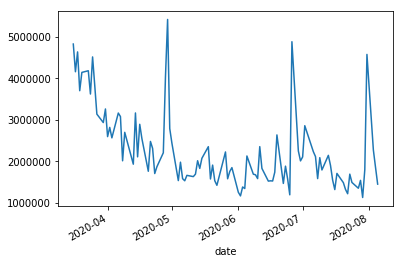

In [5]:
jeff.stocks['GOOGL'].daily['5. volume'].plot()

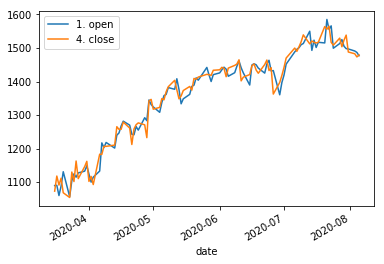

In [6]:
jeff.stocks['GOOGL'].daily[['1. open','4. close']].plot()

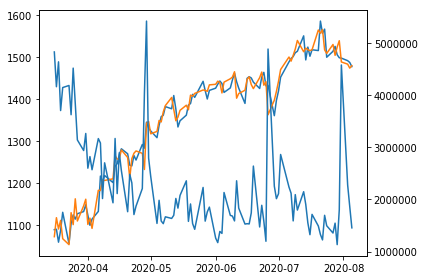

In [7]:
volume = jeff.stocks['GOOGL'].daily['5. volume']#*max(jeff.stocks['GOOGL'].daily['1. open'])
df = jeff.stocks['GOOGL'].daily[['1. open', '4. close']]#/max(jeff.stocks['GOOGL'].daily['1. open'].max(), 
                                                           #jeff.stocks['GOOGL'].daily['4. close'].max()) 
#df['5. volume'] = volume

fig, ax1 = plt.subplots()
ax1.plot(df)

ax2 = ax1.twinx()
ax2.plot(volume)

fig.tight_layout()
plt.show()
#df[10:50].plot()

In [8]:
jeff.stocks['GOOGL'].daily.describe().round(2)

,1. open,2. high,3. low,4. close,5. volume
count,100.00,100.00,100.00,100.00,100.00
mean,1358.64,1377.88,1339.64,1360.56,2268368.10
std,140.17,136.85,144.43,140.43,964229.62
min,1056.37,1066.91,1008.87,1054.13,1133773.00
25%,1263.06,1277.49,1237.95,1260.47,1583033.50
50%,1401.95,1420.50,1387.06,1407.96,1924130.50
75%,1455.08,1475.35,1446.52,1464.16,2608681.00
max,1585.03,1587.05,1552.62,1564.85,5417888.00


In [9]:
std = jeff.stocks['GOOGL'].daily.describe()['5. volume']['std']
mean = jeff.stocks['GOOGL'].daily.describe()['5. volume']['mean']

for i in range(0,100):
    try:
        change = jeff.stocks['GOOGL'].percentChange(i+1, i, kind='volume', isDaily=1)
        if change > (std/mean)*100:
            jeff.sell('GOOGL', (change/100)*jeff.shares['GOOGL']+5, i, isDaily=1)
        if change < (-std/mean)*100:
            jeff.buy('GOOGL', -(change/100)*jeff.shares['GOOGL']+10, i, isDaily=1)
        print(change)
    except IndexError:
        print('You\'ve reached the end of your dataset')
        

-13.806415731848096
11.47091391032881
-20.134229345847604
11.8989870513668
0.9588076151506663
-13.390145254275653
24.637588365735827
-15.095561230974441
-18.119054188610434
-6.460379002701247
11.139369121844766
-20.38780369065779
8.543905201385867
-8.928805680059167
23.2529448817181
-2.6859204590284684
-34.542601238901575
33.95178193426631
-28.36634618125336
28.37 shares of GOOGL were sold for $35173.3
63.70296951932895
-33.33541675742188
37.072612439756384
-11.812148653583012
-30.87623745311075
40.677362904395764
-6.711719768418034
-26.15390328665096
9.466108265959972
18.019673034886676
Oh no, you don't have that many shares to sell. Selling them all.
8.31 shares of GOOGL were sold for $10663.39
82.63462320981039
34.27208428634697
10.0 shares of GOOGL were purchased for $13313.6
-48.46471540201643
-12.484044404904653
-36.96284182792768
28.757870791451534
-20.00128068216998
-3.2023869474212305
8.508033824298305
-1.8380581426677798
3.6689048424800226
19.01851198850858
-9.184831183449894

In [10]:
print(std/mean)

0.4250763443851588


In [11]:
jeff.stocks['GOOGL'].daily

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2020-03-16,1089.61,1145.4700,1067.080,1073.00,4825981.0
2020-03-17,1090.64,1126.0000,1049.100,1118.06,4159686.0
2020-03-18,1059.94,1104.9900,1037.000,1091.19,4636840.0
2020-03-19,1088.22,1152.6100,1055.550,1111.67,3703248.0
2020-03-20,1130.90,1138.4800,1062.100,1068.21,4143897.0
2020-03-23,1056.37,1066.9100,1008.870,1054.13,4183629.0
2020-03-24,1103.98,1133.3300,1086.430,1130.01,3623435.0
2020-03-25,1124.58,1146.1700,1083.010,1101.62,4516162.0
2020-03-26,1114.72,1171.4800,1092.030,1162.92,3834422.0


In [12]:
jeff2 = Portfolio(100000)
jeff2.buy('GOOGL', 50000, isShares=0, isDaily=1)

45.84 shares of GOOGL were purchased for $50000


In [13]:
std = jeff2.stocks['GOOGL'].daily.describe()['1. open']['std']
mean = jeff2.stocks['GOOGL'].daily.describe()['1. open']['mean']

print(std/mean)

for i in range(0,100):
    try:
        change = jeff2.stocks['GOOGL'].percentChange(i+1, i, kind='buy', isDaily=1)
        if change > (std/mean)*30:
            jeff2.sell('GOOGL', (change)*jeff2.shares['GOOGL']+5, i, isDaily=1)
        if change < (-std/mean)*30:
            jeff2.buy('GOOGL', -(change)*jeff2.shares['GOOGL']+10, i, isDaily=1)
        print(change)
    except IndexError:
        print('You\'ve reached the end of your dataset')

0.10317001871496027
-2.8148609990464353
2.6680755514463055
Oh no, you don't have that many shares to sell. Selling them all.
45.84 shares of GOOGL were sold for $49884.0
3.9220010659609326
10.0 shares of GOOGL were purchased for $11309.0
-6.590326288796551
Oh no, you don't have that many shares to sell. Selling them all.
10.0 shares of GOOGL were sold for $10563.7
4.506943589840693
1.8659758328955154
-0.8767717725728628
1.1437849863642888
0.4585487862204824
1.4205749399632643
-2.1528122361216315
-2.135231316725979
1.3372727272727305
1.6407854957791679
You don't own any of that stock, dumbass
7.414827890556045
-1.142965135865776
1.2534286426731074
-1.3692557750086245
You don't own any of that stock, dumbass
3.201831044527676
0.527432115293109
1.6550208181242114
1.1490443044967362
-0.9214324724974601
-2.1403428643425855
-0.12875087510361521
1.9845138625907544
-0.8485154929132371
2.948207171314741
-0.6811145510835879
You don't own any of that stock, dumbass
4.816084788029921
-1.0141263940

In [14]:
jeff.getLedger()

,date,action,symbol,Δshares,Δdollars,capital
0,2020-03-16,buy,GOOGL,36.68,-40000.00,60000.00
1,2020-04-13,sell,GOOGL,-28.37,35173.30,95173.30
2,2020-04-27,sell,GOOGL,-8.31,10663.39,105836.69
3,2020-04-29,buy,GOOGL,10.00,-13313.60,92523.09
4,2020-05-22,sell,GOOGL,-10.00,14419.60,106942.69
5,2020-06-04,sell,GOOGL,0.00,-0.00,106942.69
6,2020-06-10,sell,GOOGL,0.00,-0.00,106942.69
7,2020-06-18,sell,GOOGL,0.00,-0.00,106942.69
8,2020-06-19,buy,GOOGL,10.00,-14250.10,92692.59
9,2020-06-25,sell,GOOGL,-10.00,14326.30,107018.89


In [19]:
jeff.sell('GOOGL', isDaily=1)
jeff2.sell('GOOGL', isDaily=1)

No value entered, all shares will be sold
-0.0 shares of GOOGL were sold for $-0.0
No value entered, all shares will be sold
10.0 shares of GOOGL were sold for $14768.2


In [20]:
print('volume:', round(jeff.capital),'\nbuy price:', round(jeff2.capital))

volume: 108253.0 
buy price: 97563.0


In [17]:
round(jeff.capital, 2)

108253.39

In [18]:
%matplotlib inline
percent['5. volume'].plot()

NameError: name 'percent' is not defined

In [ ]:
print('\u0394dollars')